In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set(style="darkgrid")

In [6]:
data_set = pd.read_csv('Pokemon.csv')

In [7]:
data_set

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
data_set.columns = ["id", "name", "first_type", "second_type", "total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "generation", "legendary"] 

In [9]:
data_set

,id,name,first_type,second_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [10]:
data_set.first_type.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: first_type, dtype: int64

In [11]:
data_set.second_type.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Rock        14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: second_type, dtype: int64

(array([122., 181., 126.,  44.,  49.,  84.,  44.,  56.,  63.,  31.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

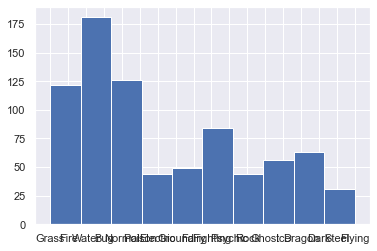

In [12]:
plt.hist(data_set.first_type)

In [13]:
data_set.sort_values('speed', ascending=True)

,id,name,first_type,second_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False


(array([ 2.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,
         0.,  0., 15.,  0.,  1.,  4.,  1., 10.,  0.,  0.,  4.,  3., 35.,
         2.,  4.,  2.,  1., 22.,  5.,  0.,  3.,  1., 32.,  3.,  6.,  5.,
         3., 29.,  3.,  2.,  6.,  1., 46.,  3.,  4.,  0.,  1., 30.,  5.,
         4.,  8.,  2., 44.,  2.,  1.,  2.,  5., 36.,  4.,  4.,  6.,  2.,
        37.,  6.,  4.,  2.,  3., 16.,  3.,  2.,  4.,  1., 33.,  4.,  1.,
         3.,  3., 27.,  5.,  1.,  1.,  1., 31.,  5.,  3.,  2.,  0., 27.,
         0.,  5.,  3.,  4., 31.,  7.,  2.,  1.,  3., 12.,  2.,  0.,  7.,
         2., 15.,  2.,  3.,  1.,  1., 11.,  2.,  0.,  1.,  0.,  5.,  2.,
         1.,  1.,  0.,  3.,  1.,  1.,  1.,  0.,  6.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]),
 array([  5,   6

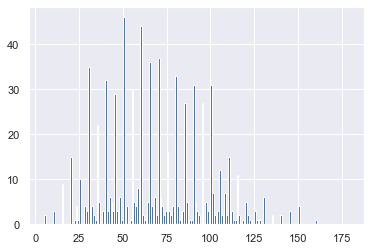

In [14]:
plt.hist(data_set.speed, bins=range(5, 180))

In [15]:
double_type = data_set.loc[~data_set.second_type.isna()]

In [16]:
double_type

,id,name,first_type,second_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [17]:
single_type = data_set.loc[data_set.second_type.isna()]

In [18]:
single_type

,id,name,first_type,second_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


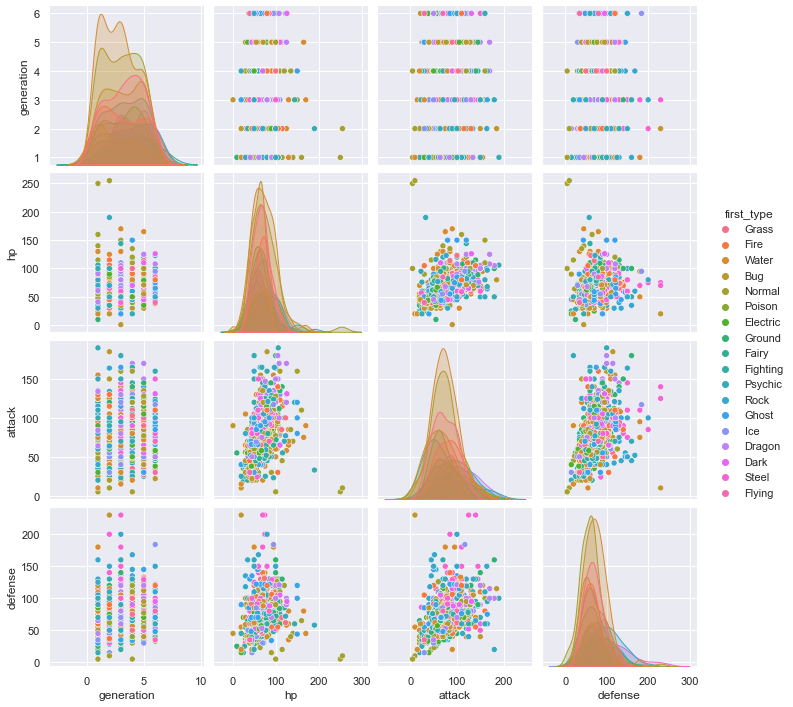

In [19]:
sns.pairplot(data_set.drop(["id", "name"], axis=1), hue='first_type', vars=["generation", "hp", "attack", "defense"])

Нормирование данных по их математическому ожиданию и стандартному отклонению (z-score):

In [74]:
data_set_values = data_set[["total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "generation"]].values
scaled_data_values = StandardScaler().fit_transform(data_set_values)
scaled_data_values

array([[-0.97676549, -0.95062622, -0.92490618, ..., -0.24818854,
        -0.80150318, -1.39963712],
       [-0.25108843, -0.3628221 , -0.5241302 , ...,  0.29115635,
        -0.28501525, -1.39963712],
       [ 0.74984544,  0.42091674,  0.09244823, ...,  1.01028289,
         0.40363531, -1.39963712],
       ...,
       [ 1.37542912,  0.42091674,  0.95565803, ...,  2.08897269,
         0.05931003,  1.61195431],
       [ 2.04271837,  0.42091674,  2.49710411, ...,  2.08897269,
         0.40363531,  1.61195431],
       [ 1.37542912,  0.42091674,  0.95565803, ...,  0.65071962,
         0.05931003,  1.61195431]])

In [33]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.2, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(scaled_data_values)
embedding.shape

(800, 2)

In [71]:
def draw_projections(data):
    first_types = {"Water":0, "Normal":1, "Grass":2, "Bug":3, "Psychic":4, "Fire":5, "Rock":6, 
               "Electric":7, "Ground":8, "Ghost":9, "Dragon":10, "Dark":11, "Poison":12, 
               "Fighting":13, "Steel":14, "Ice":15, "Fairy":16, "Flying":17}
    second_types = {"Flying":0, "Ground":1, "Poison":2, "Psychic":3, "Fighting":4, "Grass":5,
                "Fairy":6, "Steel":7, "Dark":8, "Dragon":9, "Water":10, "Rock":11,
                "Ghost":12, "Ice":13, "Fire":14, "Electric":15, "Normal":16, "Bug":17}
    
    first_colors = [sns.color_palette("hls", 18)[x] for x in data_set.first_type.map(first_types)]
    second_colors = [sns.color_palette("hls", 2)[x] 
                     for x in data_set.legendary.map(lambda v: 0 if v else 1)]
    gen_colors = [sns.color_palette("hls", 7)[x] for x in data_set.generation]
    
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(221, projection='3d' if data.shape[1] == 3 else None)
    ax2 = fig.add_subplot(222, projection='3d' if data.shape[1] == 3 else None)
    ax3 = fig.add_subplot(223, projection='3d' if data.shape[1] == 3 else None)
    ax4 = fig.add_subplot(224, projection='3d' if data.shape[1] == 3 else None)
    
    if data.shape[1] == 1:
        ax1.scatter(data[:, 0])
        ax2.scatter(data[:, 0], c=first_colors)
        ax3.scatter(data[:, 0], c=second_colors)
        ax4.scatter(data[:, 0], c=gen_colors)
    elif data.shape[1] == 2:
        ax1.scatter(data[:, 0], data[:, 1])
        ax2.scatter(data[:, 0], data[:, 1], c=first_colors)
        ax3.scatter(data[:, 0], data[:, 1], c=second_colors)
        ax4.scatter(data[:, 0], data[:, 1], c=gen_colors)
    elif data.shape[1] == 3:
        ax1.scatter(data[:, 0], data[:, 1], data[:, 2])   
        ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=first_colors)
        ax3.scatter(data[:, 0], data[:, 1], data[:, 2], c=second_colors)
        ax4.scatter(data[:, 0], data[:, 1], data[:, 2], c=gen_colors) 
        
    ax1.title.set_text('UMAP projection (raw)')
    ax2.title.set_text('UMAP projection by first type')
    ax3.title.set_text('UMAP projection by second type')
    ax4.title.set_text('UMAP projection by generation')
    plt.title("n_neighbors = {}".format(data.shape[1]))

In [63]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    
    data = fit.fit_transform(scaled_data_values);
    
    draw_projections(data)

Проекция по первому типу:

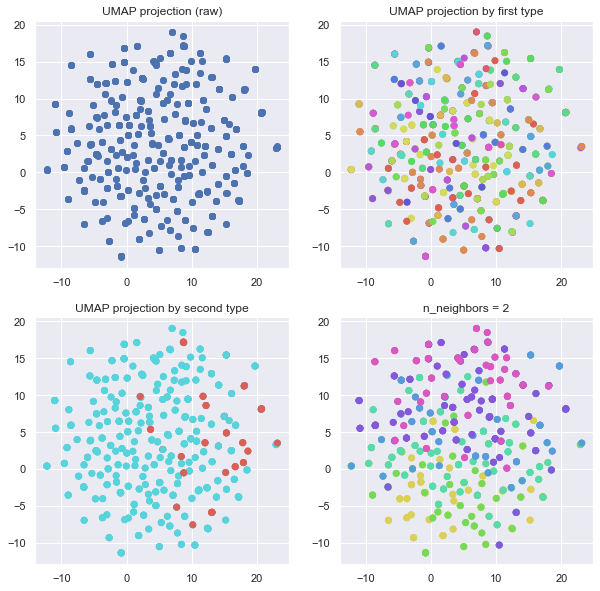

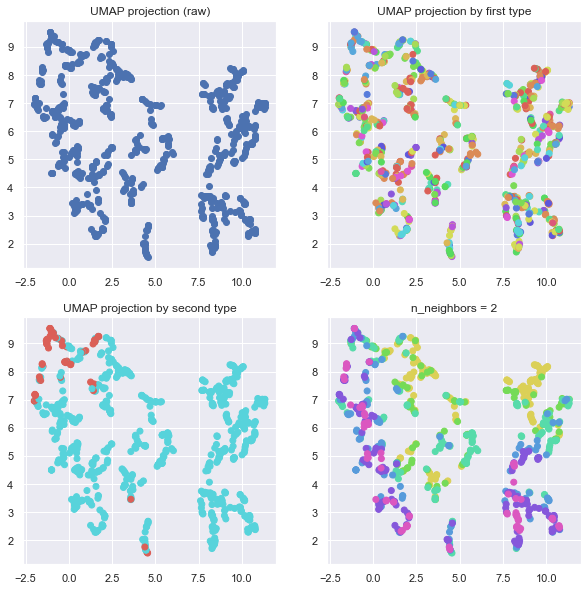

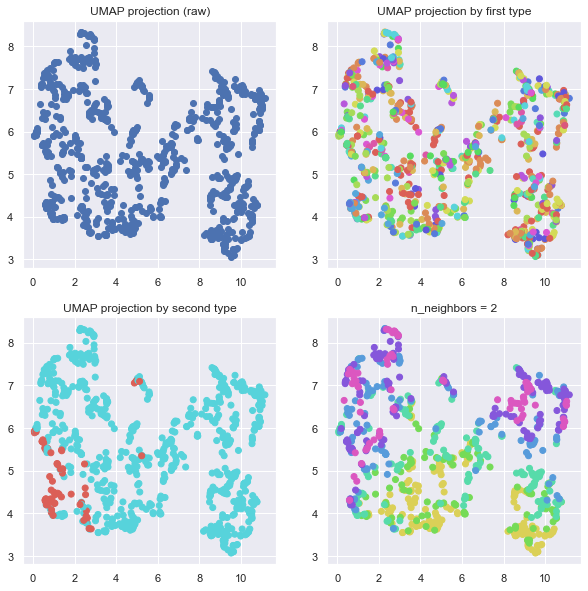

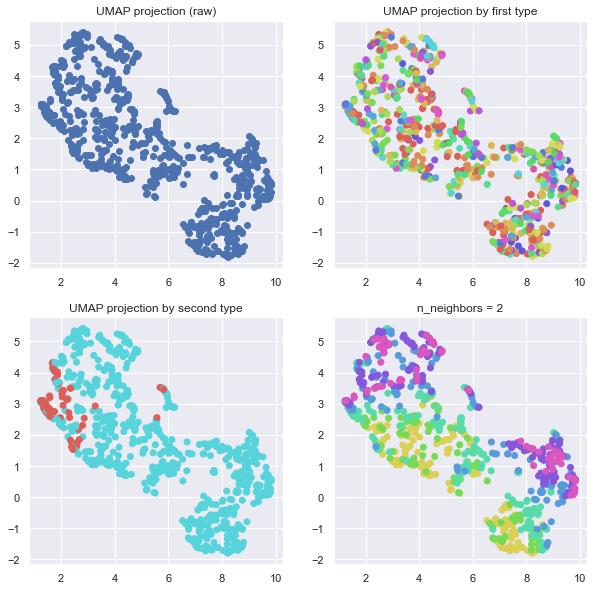

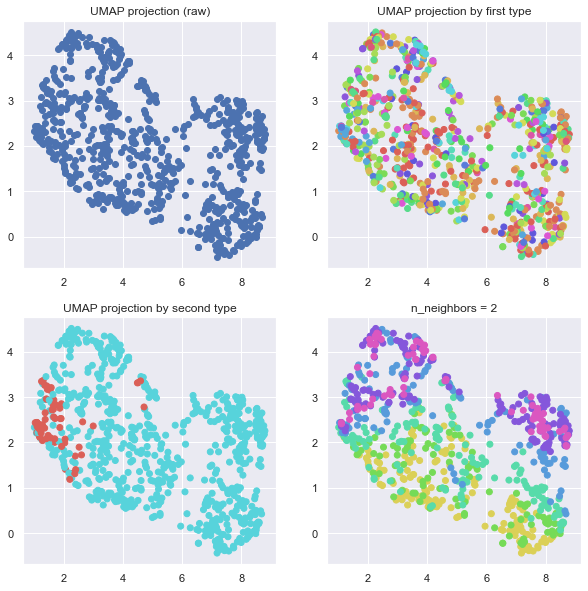

In [75]:
for i in [2, 5, 10, 20, 50]:
    draw_umap(n_neighbors=i, min_dist=0.0, n_components=2, metric='euclidean', title='')

Проекция по второму типу:

In [ ]:
second_types = {"Flying":0, "Ground":1, "Poison":2, "Psychic":3, "Fighting":4, "Grass":5,
                "Fairy":6, "Steel":7, "Dark":8, "Dragon":9, "Water":10, "Rock":11,
                "Ghost":12, "Ice":13, "Fire":14, "Electric":15, "Normal":16, "Bug":17}
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette("hls", 19)[x] 
       for x in data_set.second_type.map(lambda v: 18 if pd.isna(v) else second_types[v])])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Pokemon dataset', fontsize=24)

In [ ]:
data_set.generation.value_counts()

Проекция по поколениям: